In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, sys, time
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import data_preprocessor as dp
from sklearn.metrics import mean_squared_error

In [2]:
filepath = "E:/csvfile/source/"
station_list = [1]#range(1, 100, 40)
file_list = []
df_list = []

for i in station_list:
    file_str = 'data_sno_'+str(i).zfill(3)+'.csv'
    file_list = file_list + [file_str] 
    
df_list =[]
mse_list = []
new_df = pd.DataFrame()
#read data from file
if True:
    #filesinpath = os.listdir(filepath)
    #for f in sorted(filesinpath):
    for f in file_list:
        print("file name:", f)
        df = pd.read_csv(filepath + f)
        df = df[df.sno != 'sno']
        df = df.drop_duplicates(keep='first')
        l = len(df)
        df['time'] =  pd.date_range("2018-02-01", periods=l, freq="H")
        df = df.set_index(pd.DatetimeIndex(df['time'])).sort_index()
        df = df.drop(columns=['Unnamed: 0']).asfreq('H')
        new_df = dp.data_preprocess(df)
        df_list = df_list + [new_df]

file name: data_sno_001.csv


<AxesSubplot:xlabel='time'>

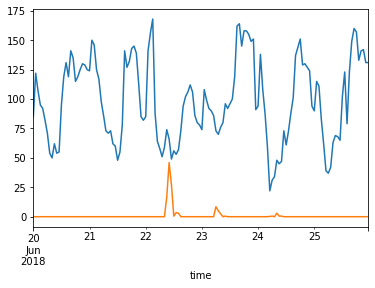

In [7]:
new_df['20180620':'20180625'].bemp.plot()
new_df['20180620':'20180625'].H_24R.plot()

<AxesSubplot:xlabel='time'>

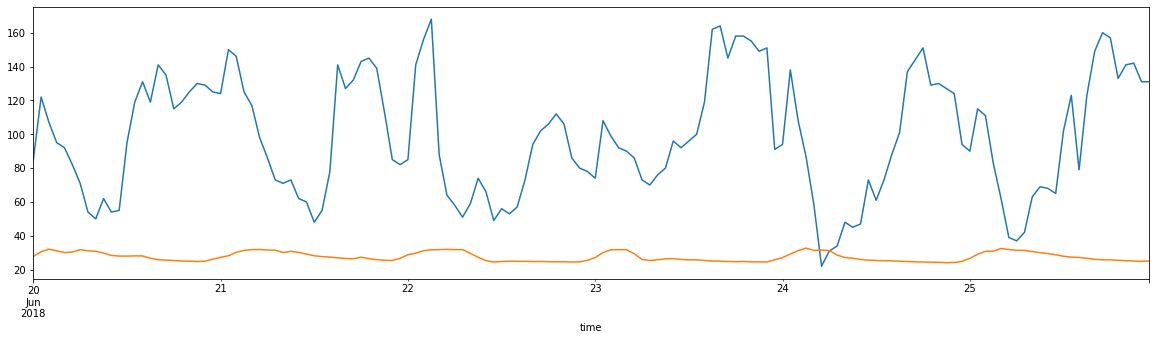

In [14]:
new_df['20180620':'20180625'].bemp.plot(figsize=(20,5))
new_df['20180620':'20180625'].TEMP.plot(figsize=(20,5))

<AxesSubplot:xlabel='time'>

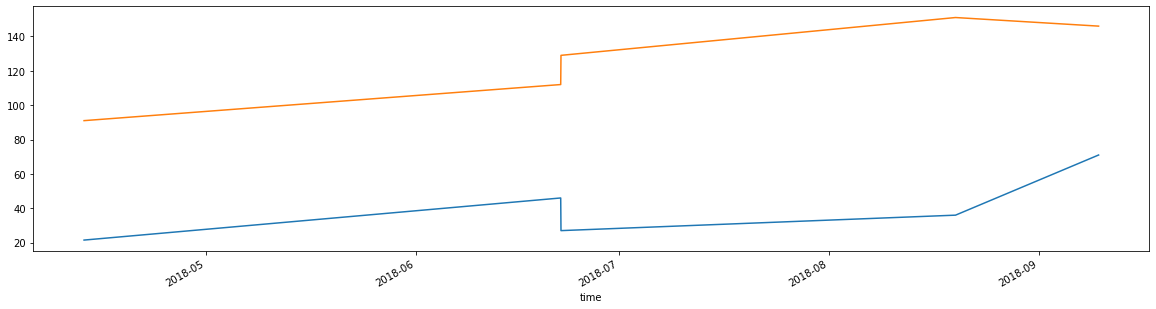

In [16]:
new_df[new_df.H_24R > 20].H_24R.plot(figsize=(20,5))
new_df[new_df.H_24R > 20].sbi.plot(figsize=(20,5))

In [30]:
new_df[new_df.H_24R > 10].H_24R

time
2018-04-13 01:00:00    21.5
2018-04-24 20:00:00    11.0
2018-05-30 03:00:00    12.5
2018-05-31 04:00:00    16.0
2018-05-31 05:00:00    12.5
2018-06-22 09:00:00    17.0
2018-06-22 10:00:00    46.0
2018-06-22 11:00:00    27.0
2018-07-11 17:00:00    16.0
2018-07-11 18:00:00    15.0
2018-07-11 21:00:00    17.0
2018-07-11 23:00:00    13.5
2018-08-13 11:00:00    15.5
2018-08-13 12:00:00    11.0
2018-08-19 17:00:00    36.0
2018-08-29 15:00:00    14.0
2018-08-31 16:00:00    12.5
2018-09-01 16:00:00    20.0
2018-09-09 18:00:00    12.0
2018-09-09 19:00:00    10.5
2018-09-09 20:00:00    71.0
2018-09-09 21:00:00    18.0
2018-09-16 12:00:00    11.5
Name: H_24R, dtype: float64

<AxesSubplot:xlabel='time'>

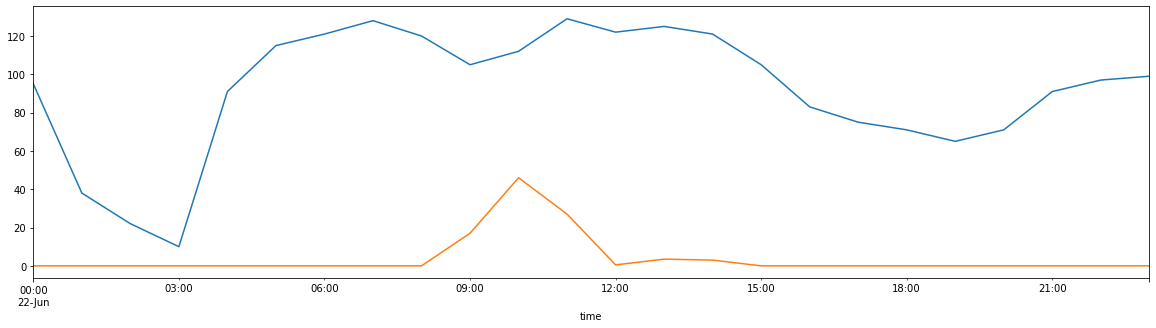

In [32]:
new_df['20180622':'20180622'].sbi.plot(figsize=(20,5))
new_df['20180622':'20180622'].H_24R.plot(figsize=(20,5))

<AxesSubplot:xlabel='time'>

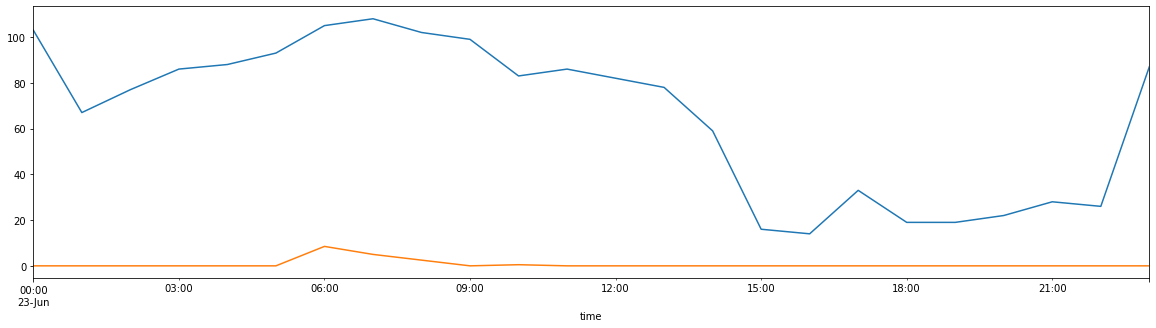

In [33]:
new_df['20180623':'20180623'].sbi.plot(figsize=(20,5))
new_df['20180623':'20180623'].H_24R.plot(figsize=(20,5))

<AxesSubplot:xlabel='time'>

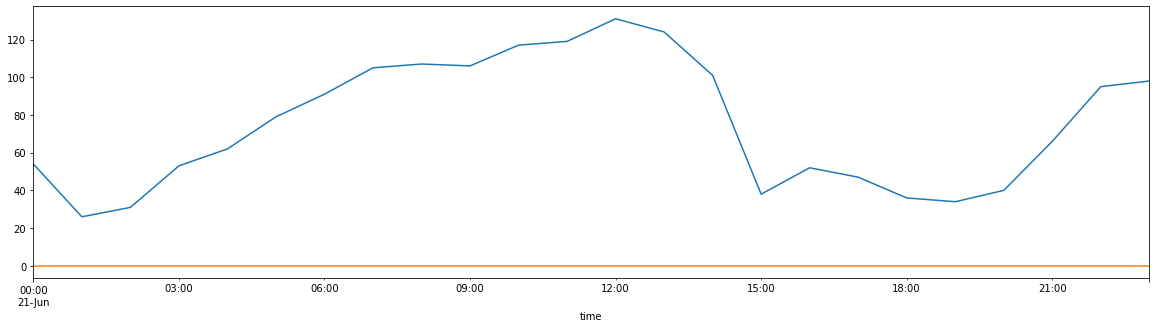

In [34]:
new_df['20180621':'20180621'].sbi.plot(figsize=(20,5))
new_df['20180621':'20180621'].H_24R.plot(figsize=(20,5))

In [42]:
filepath = "E:/csvfile/source/"
filepath2 = "E:/csvfile/source2/"
filesinpath = os.listdir(filepath)
for f in sorted(filesinpath):
    print("file name:", f)
    df = pd.read_csv(filepath + f)
    df = df[df.sno != 'sno']
    df = df.drop_duplicates(keep='first')
    df['time'] = df['Unnamed: 0']
    df = df.set_index(pd.DatetimeIndex(df['time'])).sort_index()
    df = df.drop(columns=['Unnamed: 0','time'])
    df.to_csv(filepath2 + f)

file name: data_sno_001.csv
file name: data_sno_002.csv
file name: data_sno_003.csv
file name: data_sno_004.csv
file name: data_sno_005.csv
file name: data_sno_006.csv
file name: data_sno_007.csv
file name: data_sno_008.csv
file name: data_sno_009.csv
file name: data_sno_010.csv
file name: data_sno_011.csv
file name: data_sno_012.csv
file name: data_sno_013.csv
file name: data_sno_014.csv
file name: data_sno_015.csv
file name: data_sno_016.csv
file name: data_sno_017.csv
file name: data_sno_018.csv
file name: data_sno_019.csv
file name: data_sno_020.csv
file name: data_sno_021.csv
file name: data_sno_022.csv
file name: data_sno_023.csv
file name: data_sno_024.csv
file name: data_sno_025.csv
file name: data_sno_026.csv
file name: data_sno_027.csv
file name: data_sno_028.csv
file name: data_sno_029.csv
file name: data_sno_030.csv
file name: data_sno_031.csv
file name: data_sno_032.csv
file name: data_sno_033.csv
file name: data_sno_034.csv
file name: data_sno_035.csv
file name: data_sno_

file name: data_sno_298.csv
file name: data_sno_299.csv
file name: data_sno_300.csv
file name: data_sno_301.csv
file name: data_sno_302.csv
file name: data_sno_303.csv
file name: data_sno_304.csv
file name: data_sno_305.csv
file name: data_sno_306.csv
file name: data_sno_307.csv
file name: data_sno_308.csv
file name: data_sno_309.csv
file name: data_sno_310.csv
file name: data_sno_311.csv
file name: data_sno_312.csv
file name: data_sno_313.csv
file name: data_sno_314.csv
file name: data_sno_315.csv
file name: data_sno_316.csv
file name: data_sno_317.csv
file name: data_sno_318.csv
file name: data_sno_319.csv
file name: data_sno_320.csv
file name: data_sno_321.csv
file name: data_sno_322.csv
file name: data_sno_323.csv
file name: data_sno_324.csv
file name: data_sno_325.csv
file name: data_sno_326.csv
file name: data_sno_327.csv
file name: data_sno_328.csv
file name: data_sno_329.csv
file name: data_sno_330.csv
file name: data_sno_331.csv
file name: data_sno_332.csv
file name: data_sno_